In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("ml-20m/movies.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Import the ratings dataset
ratings = pd.read_csv('ml-20m/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


In [6]:
# Calculate the average rating of romance and scifi movies
import helper

In [7]:
genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
userId,,
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


In [8]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


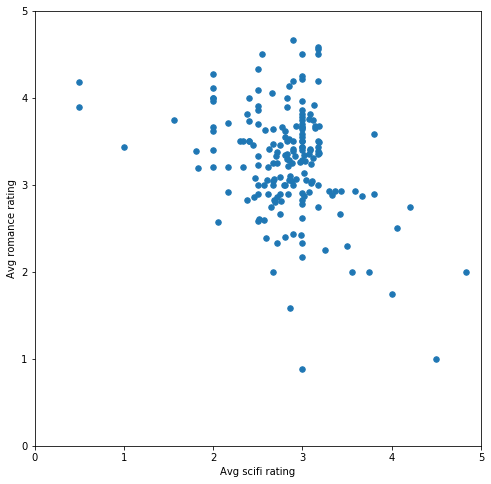

In [9]:

%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [10]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

In [11]:
from sklearn.cluster import KMeans

In [12]:
# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters = 2,random_state=42)

In [13]:
# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

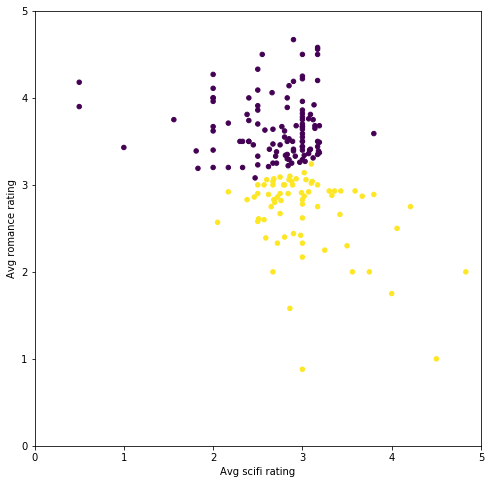

In [14]:
helper.draw_clusters(biased_dataset, predictions)

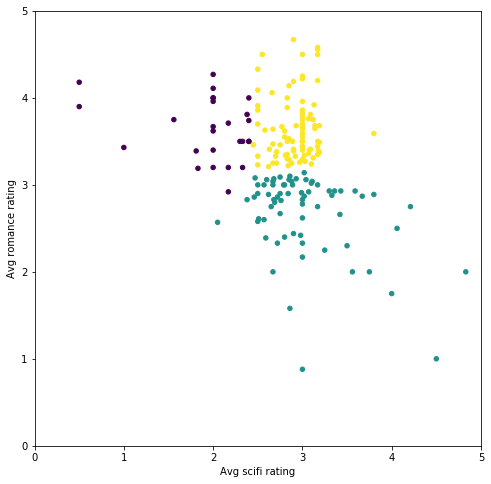

In [15]:
# TODO: Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3,random_state=42)

# TODO: use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2)

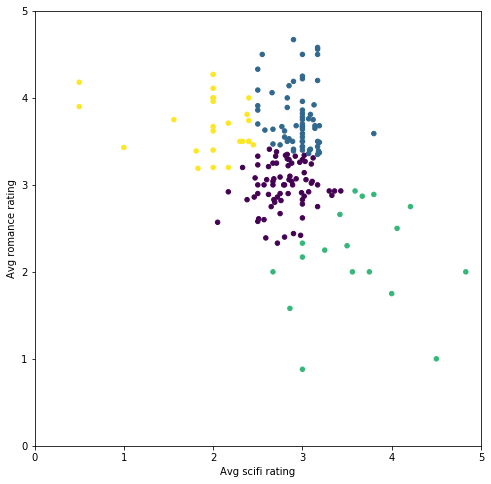

In [16]:
# TODO: Create an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters=4,random_state=42)

# TODO: use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3)

In [17]:
possible_k_values = range(2, len(X)+1, 5)

# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]

C:\Users\rohit_v03\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (178) found smaller than n_clusters (182). Possibly due to duplicate points in X.
  return_n_iter=True)


In [18]:
list(zip(possible_k_values, errors_per_k))

[(2, 0.3558817876472827),
 (7, 0.3862169048216939),
 (12, 0.35959253308750333),
 (17, 0.37679014545176137),
 (22, 0.36697025186293747),
 (27, 0.3664327778292643),
 (32, 0.3656339173901515),
 (37, 0.36445305188507116),
 (42, 0.37590674444475863),
 (47, 0.381205902029379),
 (52, 0.3733507676702072),
 (57, 0.37075503547433203),
 (62, 0.3590315725675196),
 (67, 0.3629796084761907),
 (72, 0.34467254665259983),
 (77, 0.3454813935296295),
 (82, 0.33459713907363775),
 (87, 0.3463687117598364),
 (92, 0.3292265809178557),
 (97, 0.31422674906618614),
 (102, 0.31752615403465234),
 (107, 0.3039364047856556),
 (112, 0.30229780004735857),
 (117, 0.2723160596452884),
 (122, 0.2708271198848384),
 (127, 0.2629819562694249),
 (132, 0.25770472828399527),
 (137, 0.23074726180530275),
 (142, 0.22134744451657157),
 (147, 0.20113178246923977),
 (152, 0.18294703129044054),
 (157, 0.1644751402208559),
 (162, 0.1466567629012301),
 (167, 0.12920960729960135),
 (172, 0.10075966098920461),
 (177, 0.0642301201631745

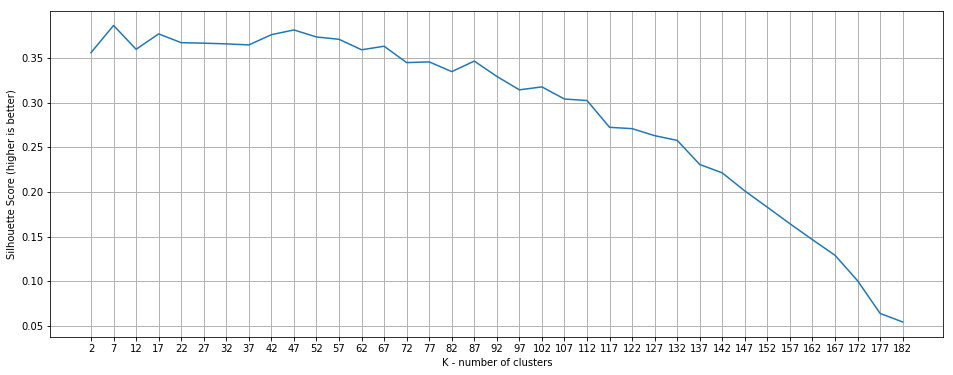

In [19]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

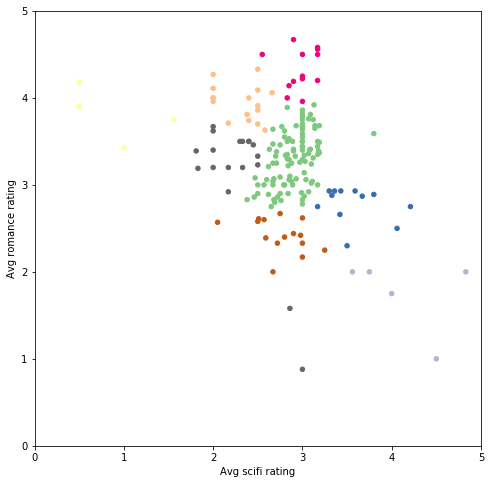

In [20]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=10, random_state=42)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent') 

In [21]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [22]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                                           'avg_romance_rating', 
                                                           'avg_action_rating']].values

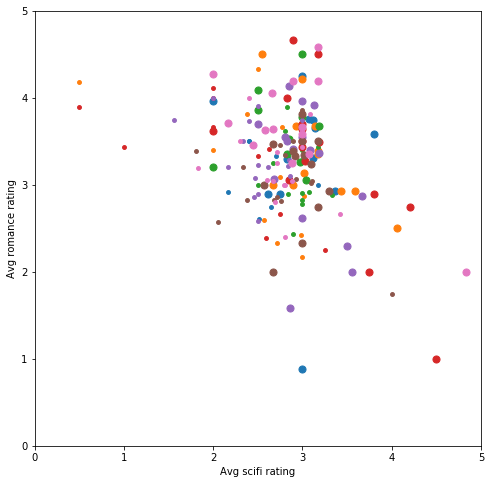

In [23]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7,random_state=42)

# TODO: use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(biased_dataset_3_genres)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

In [24]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )

In [25]:
ratings_title.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [26]:
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

In [27]:

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [28]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0


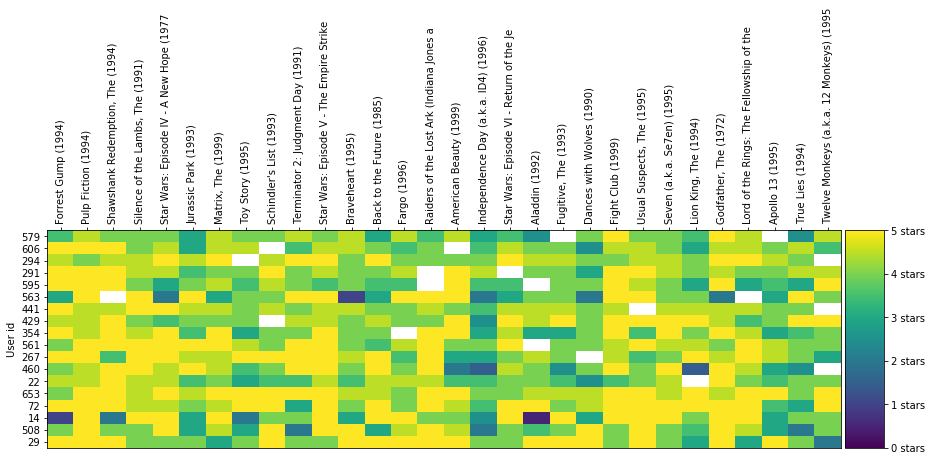

In [29]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

In [33]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)

In [34]:
from scipy.sparse import csr_matrix

In [35]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

In [36]:
sparse_ratings

<671x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 62397 stored elements in Compressed Sparse Row format>

In [38]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full',random_state=42).fit_predict(sparse_ratings)

D:\workspaces\python\udacity\machine-learning-master\projects\study\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
D:\workspaces\python\udacity\machine-learning-master\projects\study\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\rohit_v03\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


cluster # 1
# of users in cluster: 292. # of users in plot: 70


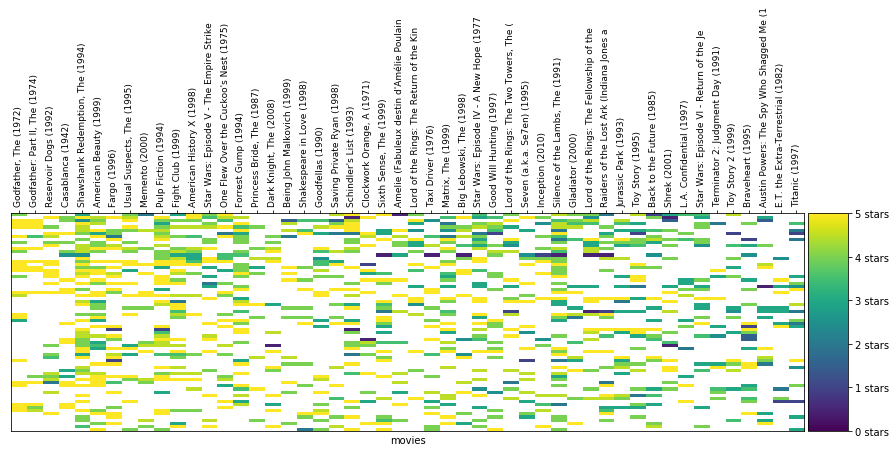

cluster # 3
# of users in cluster: 32. # of users in plot: 32


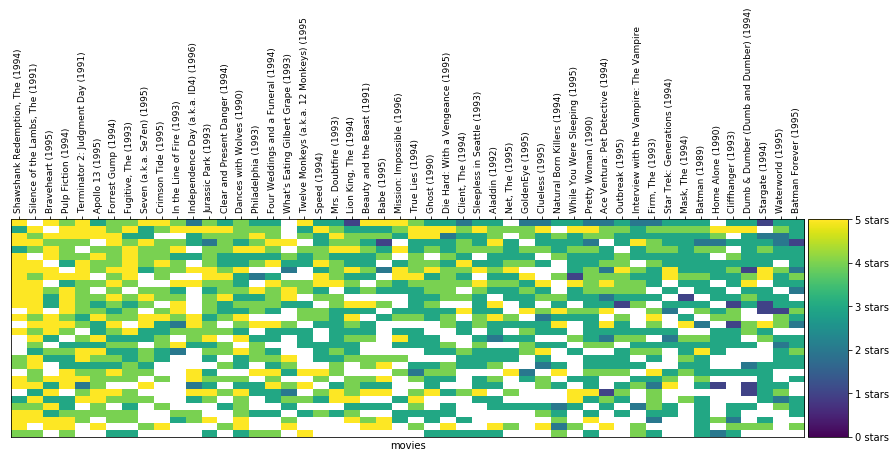

cluster # 15
# of users in cluster: 81. # of users in plot: 70


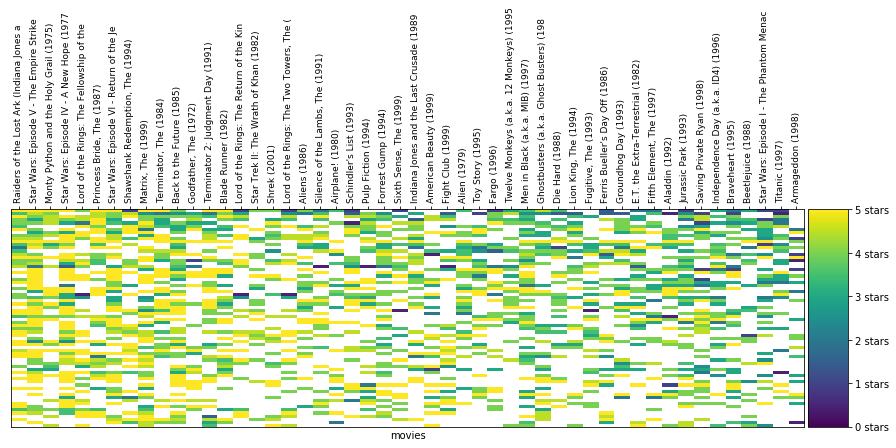

cluster # 18
# of users in cluster: 40. # of users in plot: 40


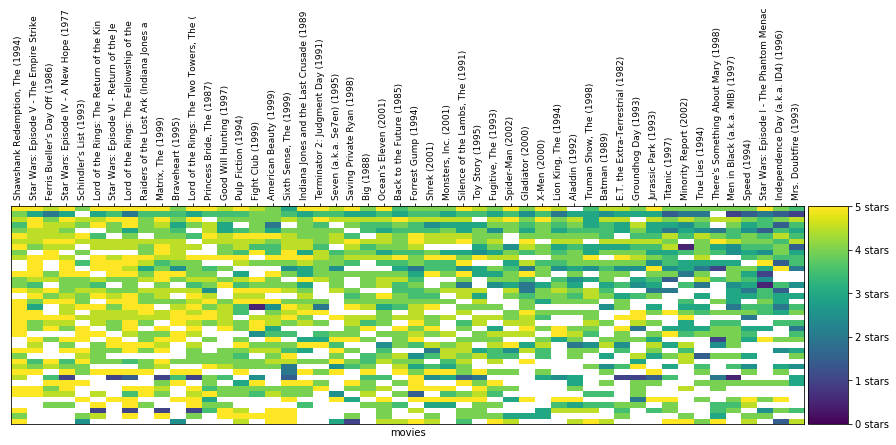

cluster # 6
# of users in cluster: 36. # of users in plot: 36


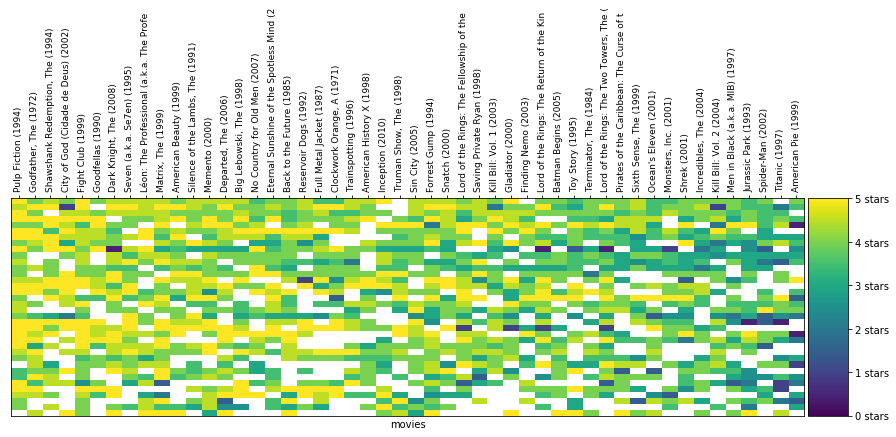

cluster # 7
# of users in cluster: 37. # of users in plot: 37


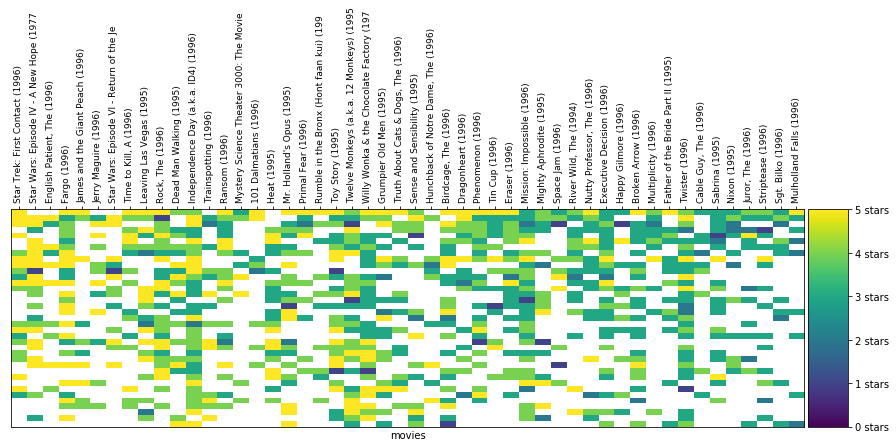

cluster # 9
# of users in cluster: 60. # of users in plot: 60


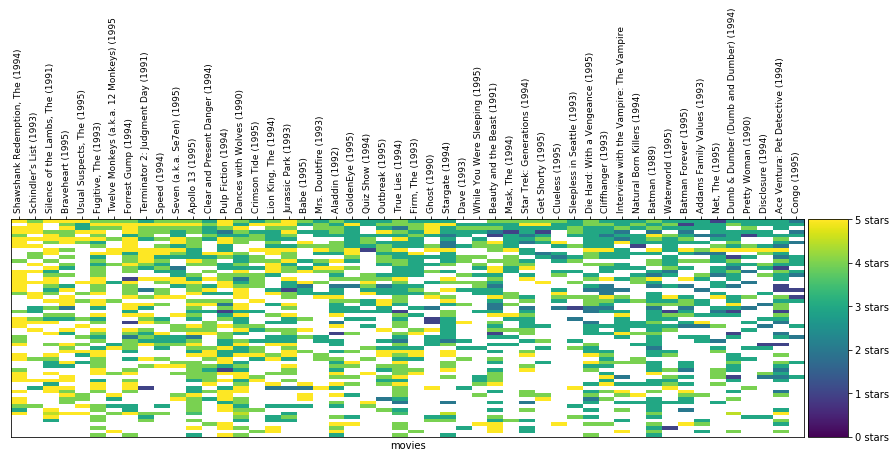

cluster # 0
# of users in cluster: 41. # of users in plot: 41


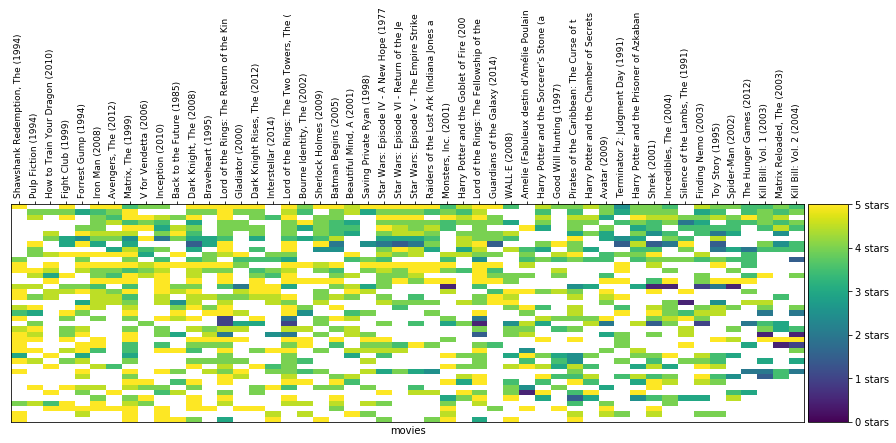

cluster # 8
# of users in cluster: 10. # of users in plot: 10


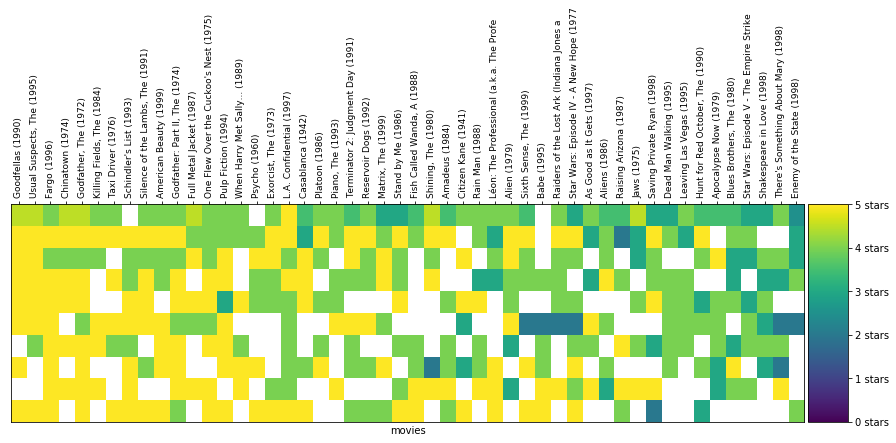

In [39]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

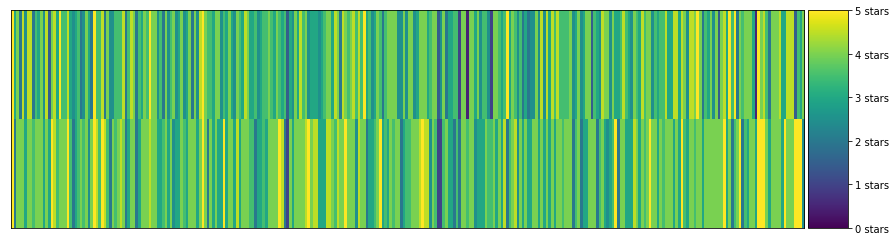

In [40]:
# TODO: Pick a cluster ID from the clusters above
cluster_number = 11

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

In [41]:
cluster.fillna('').head()

,Forrest Gump (1994),Bowfinger (1999),"Hudsucker Proxy, The (1994)",Tommy Boy (1995),Raging Bull (1980),Bruce Almighty (2003),Go (1999),Primal Fear (1996),Cruel Intentions (1999),Star Trek (2009),...,Die Hard (1988),"Bourne Identity, The (2002)",Amadeus (1984),Leaving Las Vegas (1995),Kill Bill: Vol. 1 (2003),American History X (1998),2001: A Space Odyssey (1968),Austin Powers: International Man of Mystery (1997),There's Something About Mary (1998),Finding Nemo (2003)
0,5.0,3.0,4.0,2.0,4.5,2.5,4.5,4.5,2.0,3.5,...,4.5,3.0,3.0,4.5,4.5,4.5,1.5,3.5,3.0,4.0
1,5.0,2.0,4.0,4.0,4.0,3.0,4.0,4.0,3.5,4.0,...,4.0,3.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,2.5


In [47]:
# TODO: Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
movie_name = "Forrest Gump (1994)"

In [48]:
cluster[movie_name].mean()

5.0

In [49]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

Forrest Gump (1994)                       5.00
Bowfinger (1999)                          2.50
Hudsucker Proxy, The (1994)               4.00
Tommy Boy (1995)                          3.00
Raging Bull (1980)                        4.25
Bruce Almighty (2003)                     2.75
Go (1999)                                 4.25
Primal Fear (1996)                        4.25
Cruel Intentions (1999)                   2.75
Star Trek (2009)                          3.75
40-Year-Old Virgin, The (2005)            3.50
Dark City (1998)                          4.00
School of Rock (2003)                     2.75
Shutter Island (2010)                     4.25
Chicago (2002)                            2.25
Black Hawk Down (2001)                    4.50
Prestige, The (2006)                      4.50
Dracula (Bram Stoker's Dracula) (1992)    3.25
Slumdog Millionaire (2008)                4.50
Fast Times at Ridgemont High (1982)       3.75
dtype: float64

In [51]:
cluster.shape

(2, 300)

In [55]:
# TODO: Pick a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
user_id = 1

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

Series([], Name: 0, dtype: float64)

<bound method Series.unique of 0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          2
21          2
22          2
23          2
24          2
25          2
26          2
27          2
28          2
29          2
         ... 
99974     671
99975     671
99976     671
99977     671
99978     671
99979     671
99980     671
99981     671
99982     671
99983     671
99984     671
99985     671
99986     671
99987     671
99988     671
99989     671
99990     671
99991     671
99992     671
99993     671
99994     671
99995     671
99996     671
99997     671
99998     671
99999     671
100000    671
100001    671
100002    671
100003    671
Name: userId, Length: 100004, dtype: int64>